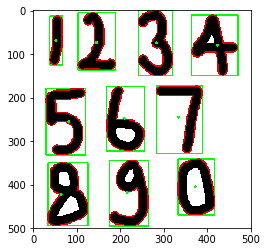

In [7]:
import cv2
import numpy as np        
import matplotlib.pyplot as plt


def image_show(img):
    cv2.imshow('digits',img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
img = cv2.imread('digits/out.png',2)
img_org =  cv2.imread('digits/out.png')
ret,thresh = cv2.threshold(img,127,255,0)
im2,contours,hierarchy = cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
for j,cnt in enumerate(contours):
    M = cv2.moments(cnt)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt,True)
    epsilon = 0.001*cv2.arcLength(cnt,True)
    approx = cv2.approxPolyDP(cnt,epsilon,True)

    hull = cv2.convexHull(cnt)
    k = cv2.isContourConvex(cnt)
    x,y,w,h = cv2.boundingRect(cnt)
#     if(w<300 and h <300 and (w>50 or h>50) and w>15  and h> 25):
    if(hierarchy[0][j][3]!=-1):
        cv2.rectangle(img_org,(x,y),(x+w,y+h),(0,255,0),2)
        
#         roi = img[y:y+h, int(x-h/2):int(x+h/2)]
        roi = img[y:y+h, x:x+w]
        path =  'digits/all/' + str(j) + '.png'
        cv2.imwrite(path, roi)
    
    
    #drawing contours
        rect = cv2.minAreaRect(cnt)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        cv2.drawContours(img_org,[approx],0,(0,0,225),2)
    
    
        (x,y),radius = cv2.minEnclosingCircle(cnt)
        center = (int(x),int(y))
        radius = int(radius)
        im = cv2.circle(img_org,center,2,(0,255,0),2)

im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im)

In [92]:
hierarchy[0][0]
for i,x in enumerate(hierarchy[0]):
    print(i,x)

0 [ 1 -1 -1 -1]
1 [ 2  0 -1 -1]
2 [ 3  1 -1 -1]
3 [ 4  2 -1 -1]
4 [ 5  3 -1 -1]
5 [ 6  4 -1 -1]
6 [-1  5  7 -1]
7 [ 8 -1 -1  6]
8 [ 9  7 -1  6]
9 [10  8 -1  6]
10 [11  9 -1  6]
11 [12 10 -1  6]
12 [13 11 -1  6]
13 [14 12 -1  6]
14 [15 13 -1  6]
15 [16 14 -1  6]
16 [-1 15 -1  6]


In [56]:
hierarchy

array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [ 3,  1, -1, -1],
        [ 4,  2, -1, -1],
        [ 5,  3, -1, -1],
        [ 6,  4, -1, -1],
        [-1,  5,  7, -1],
        [ 8, -1, -1,  6],
        [ 9,  7, -1,  6],
        [10,  8, -1,  6],
        [11,  9, -1,  6],
        [12, 10, -1,  6],
        [13, 11, -1,  6],
        [14, 12, -1,  6],
        [15, 13, -1,  6],
        [16, 14, -1,  6],
        [-1, 15, -1,  6]]], dtype=int32)